C:\Users\person\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


                     feature  importances
0       section_names_header     0.013643
1            ent_q_diffs_var     0.008315
2  ent_q_diff_diffs_1_median     0.007289
3     ent_q_diff_diffs_2_min     0.007116
4                     dc_por     0.006414
5                    ent_p_7     0.005984
6                    ent_p_8     0.005933
7    FreeEnvironmentStringsW     0.005796
8                  db3_rdata     0.005478
9                   ent_p_12     0.004856
          feature  importances
0  ProcCallEngine          0.0
1   PCCTL_CONTEXT          0.0
2       *invalid*          0.0
3     misc_market          0.0
4  MethCallEngine          0.0
5       fstcwimul          0.0


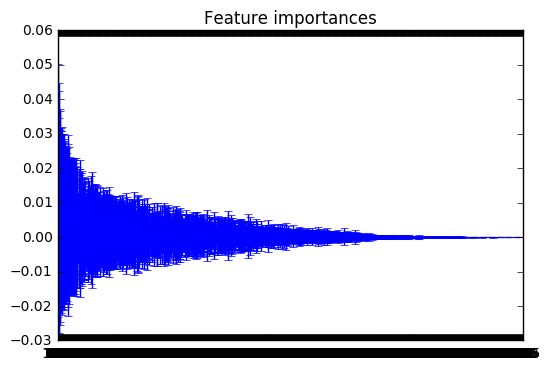

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
data=pd.read_csv("C:/Users/person/Desktop/LargeTrain.csv")

data_=data.drop(['Class'], axis=1)
class_=pd.DataFrame(data, columns=['Class'])

forest = ExtraTreesClassifier(n_estimators=1000, random_state=0, criterion="gini")
forest.fit(data_,class_)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

df1=[]
for i in range(10):
    df1.append({'feature':data.columns.values[indices[i]], 'importances':importances[indices[i]]})
print pd.DataFrame(df1)

df2=[]
for i in range(data_.shape[1]):
    if importances[indices[i]]==0:
        df2.append({'feature':data.columns.values[indices[i]], 'importances':importances[indices[i]]})
print pd.DataFrame(df2)

plt.figure()
plt.title("Feature importances")
plt.bar(range(data_.shape[1]), importances[indices], color="red", yerr=std[indices], align="center")
plt.xticks(range(data_.shape[1]), indices)
plt.xlim([-1,data_.shape[1]])
plt.show() 